In [2]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import UpSampling2D
from tensorflow.keras import Model
from tensorflow.keras.datasets import mnist
from tensorflow import keras
#from tensorflow.keras.utils import np_utils (np_utils not available in keras)
from tensorflow.keras import utils
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = utils.to_categorical(y_train, nb_classes)
y_test = utils.to_categorical(y_test, nb_classes)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
input_size = 784
hidden_size = 64
output_size = 784

In [16]:
import numpy as np
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
len(X_train)

60000

In [10]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

In [17]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0441 - val_loss: 0.0225
Epoch 2/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0175 - val_loss: 0.0132
Epoch 3/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0111 - val_loss: 0.0089
Epoch 4/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0079 - val_loss: 0.0066
Epoch 5/5
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0062 - val_loss: 0.0055


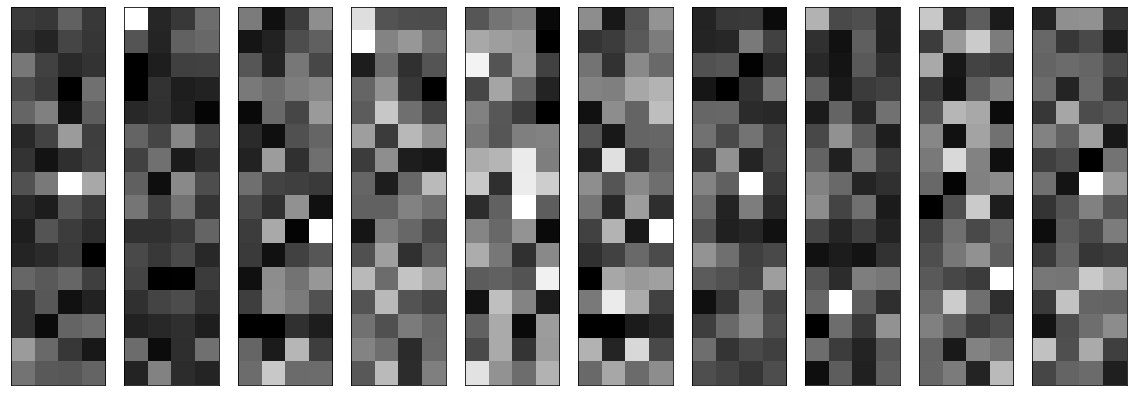

In [18]:
conv_encoder = Model(x, h)
encoded_imgs = conv_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()